In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [171]:
train_data_path=r"C:\Users\luhar\Downloads\train_df.csv"
test_data_path=r"C:\Users\luhar\Downloads\test_df.csv"

In [172]:
def load_data(filepath):
    return pd.read_csv(filepath)

train_data=load_data(train_data_path)
test_data=load_data(test_data_path)
train_data.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\luhar\\Downloads\\train_df.csv'

In [4]:
train_data['player_position_1']=train_data['player_position_1'].apply(np.round).astype('int')
train_data['player_position_2']=train_data['player_position_2'].apply(np.round).astype('int')
train_data['team1_system_id']=train_data['team1_system_id'].apply(np.round).astype('int')
train_data['team2_system_id']=train_data['team2_system_id'].apply(np.round).astype('int')

In [5]:
train_data

,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,team1_system_id,team2_system_id,player_var,team1_var,team2_var
0,13,7.0,2,0,8,7,7,0.317073,0.48,6,10,0.196649,0.289868,0.242414
1,16,6.5,1,1,8,3,9,0.463415,0.42,6,17,0.135126,0.319211,0.300952
2,4,8.5,1,0,5,11,11,0.682927,0.44,8,6,0.204265,0.258575,0.310282
3,13,8.0,1,1,4,17,17,0.682927,0.58,6,8,0.194560,0.296172,0.279054
4,11,3.5,0,0,5,10,10,0.731707,0.70,12,18,0.213998,0.271776,0.307297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,14,5.0,0,1,14,8,8,0.439024,0.26,11,11,0.197323,0.300921,0.294609
20449,3,6.0,2,1,11,4,4,0.390244,0.32,19,6,0.205322,0.339145,0.321966
20450,4,5.0,1,0,7,5,5,0.268293,0.30,21,10,0.145889,0.270368,0.339861
20451,13,6.0,1,0,8,5,5,0.463415,0.46,21,15,0.175792,0.301117,0.275702


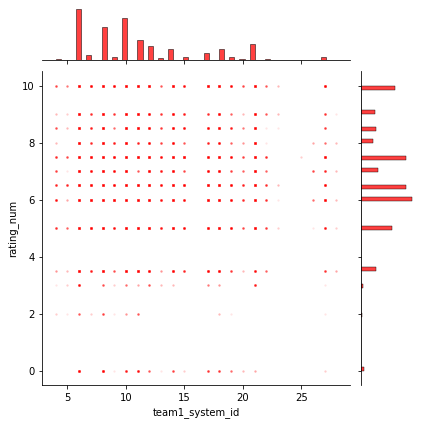

In [328]:

sns.jointplot(x=train_data['team1_system_id'],y=train_data['rating_num'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

<p>Winner columns doesnot have much empact on the rating_num</p>

In [336]:
train_data['player_height']=train_data['player_height'].apply(sq)

In [343]:
train_data['player_weight']=train_data['player_weight'].apply(sq)

In [357]:
from math import log
def sq(x):
    return 1/x
def sqrt(x):
    return pow(x,1/2)
a=pd.DataFrame()
a['square']=train_data['player_position_2'].apply(sqrt)
a['rating_num']=train_data['rating_num']
a

,square,rating_num
0,2.645751,7.0
1,3.000000,6.5
2,3.316625,8.5
3,4.123106,8.0
4,3.162278,3.5
...,...,...
20448,2.828427,5.0
20449,2.000000,6.0
20450,2.236068,5.0
20451,2.236068,6.0


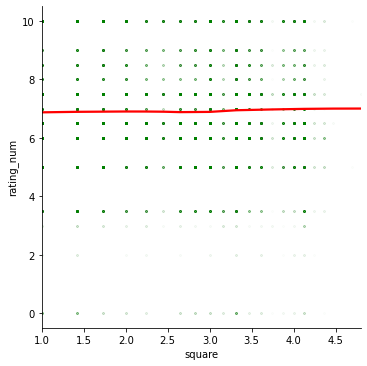

In [358]:
sns.lmplot(data = a, x = 'square', y = 'rating_num',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

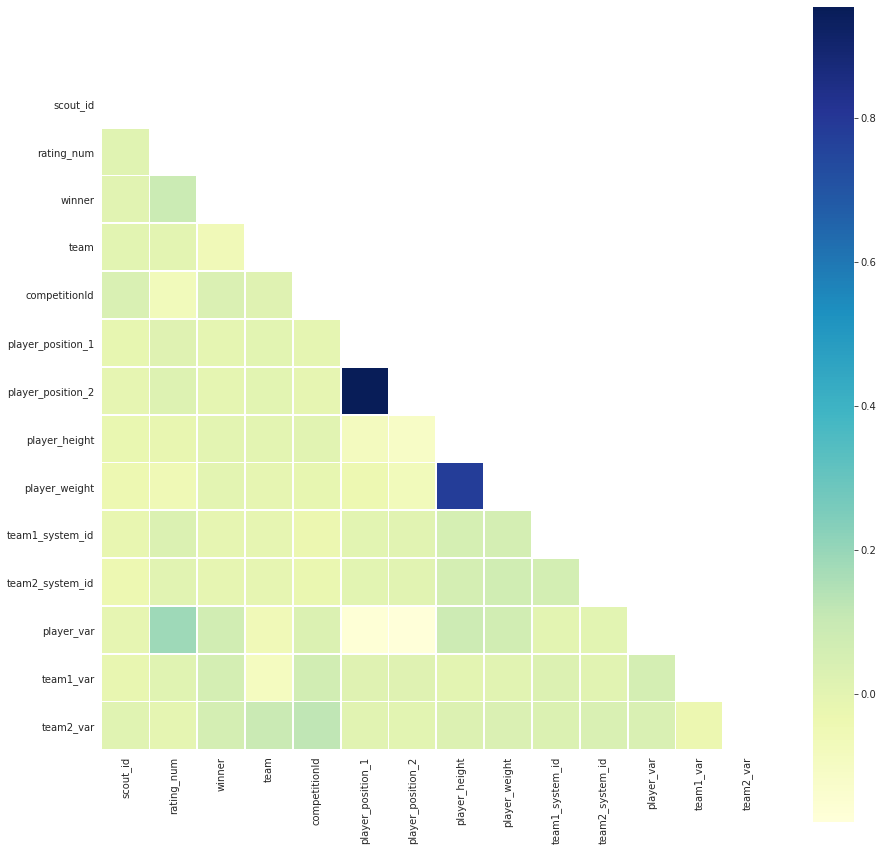

In [364]:
corr = train_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu",)

In [338]:
corr

,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,team1_system_id,team2_system_id,player_var,team1_var,team2_var
scout_id,1.000000,0.013590,0.011119,0.004946,0.041903,-0.010423,-0.007097,0.004279,-0.038816,-0.015760,-0.039615,-0.009992,-0.017129,0.013561
rating_num,0.013590,1.000000,0.089943,0.000583,-0.068516,0.019417,0.022466,0.024254,-0.053879,0.031564,0.007853,0.186348,0.013233,-0.004266
winner,0.011119,0.089943,1.000000,-0.063010,0.036078,-0.001866,-0.001372,0.007647,0.001015,-0.007524,-0.006038,0.068028,0.058426,0.060453
team,0.004946,0.000583,-0.063010,1.000000,0.020252,0.005617,0.006411,0.010477,-0.007603,-0.009115,-0.005928,-0.062000,-0.087621,0.093646
competitionId,0.041903,-0.068516,0.036078,0.020252,1.000000,-0.001401,-0.007792,-0.012492,-0.011888,-0.028565,-0.024834,0.030851,0.069202,0.122589
player_position_1,-0.010423,0.019417,-0.001866,0.005617,-0.001401,1.000000,0.954251,0.088985,-0.040224,0.006279,0.004824,-0.167168,0.017959,0.009451
player_position_2,-0.007097,0.022466,-0.001372,0.006411,-0.007792,0.954251,1.000000,0.103827,-0.071431,0.008967,0.010550,-0.178095,0.019609,0.005334
player_height,0.004279,0.024254,0.007647,0.010477,-0.012492,0.088985,0.103827,1.000000,-0.531030,-0.027314,-0.033276,-0.054631,-0.012265,-0.022618
player_weight,-0.038816,-0.053879,0.001015,-0.007603,-0.011888,-0.040224,-0.071431,-0.531030,1.000000,0.058685,0.073101,0.066627,0.010415,0.038580
team1_system_id,-0.015760,0.031564,-0.007524,-0.009115,-0.028565,0.006279,0.008967,-0.027314,0.058685,1.000000,0.060781,0.002718,0.027180,0.033498


In [6]:
test_data['player_position_1']=test_data['player_position_1'].apply(np.round).astype('int')
test_data['player_position_2']=test_data['player_position_2'].apply(np.round).astype('int')
test_data['team1_system_id']=test_data['team1_system_id'].apply(np.round).astype('int')
test_data['team2_system_id']=test_data['team2_system_id'].apply(np.round).astype('int')

In [7]:
# relocation of "rating_num" column in the last
cols = train_data.columns.tolist()
cols=cols[0:1]+cols[2:]+cols[1:2]
train_data=train_data[cols]

0        7.0
1        6.5
2        8.5
3        8.0
4        3.5
        ... 
20448    5.0
20449    6.0
20450    5.0
20451    6.0
20452    6.0
Name: rating_num, Length: 20453, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
X_train=scaler1.fit_transform(X_train)

In [11]:
X_test=scaler1.fit_transform(test_data)

In [12]:
y_train

0        7.0
1        6.5
2        8.5
3        8.0
4        3.5
        ... 
20448    5.0
20449    6.0
20450    5.0
20451    6.0
20452    6.0
Name: rating_num, Length: 20453, dtype: float64

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params={'max_iter':[800,900,1000,1200],'warm_start':[True,False],'alpha':[0.01,0.001,0.05]}

estimator=Lasso(random_state=42)
model=GridSearchCV(estimator=estimator,param_grid=params,scoring='r2',cv=5)
model.fit(X_train,y_train)



final_model=model.best_estimator_
print(model.best_estimator_.alpha)
print(model.best_estimator_.max_iter)
print(model.best_estimator_.warm_start)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.01, 0.001, 0.05],
                         'max_iter': [800, 900, 1000, 1200],
                         'warm_start': [True, False]},
             scoring='r2')

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
grid = { 
    'n_estimators': [100,200],
    'max_depth' : [10,12,15],
    'random_state' : [42]
}
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv=3,return_train_score=True,)
CV_rfr.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15], 'n_estimators': [100, 200],
                         'random_state': [42]},
             return_train_score=True)

In [249]:
print('Best score for training data:', CV_rfr.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best estimator:',CV_rfr.best_estimator_.n_estimators,"\n") 
print('Best max_depth:',CV_rfr.best_estimator_.max_depth,"\n")
#print('Best algorithm:',CV_rfr.best_estimator_.max_depth,"\n")
final_model = CV_rfr.best_estimator_

Best score for training data: 0.09155773582300071 

Best estimator: 200 

Best max_depth: 15 



In [94]:
from xgboost import XGBRegressor,XGBRFRegressor
grid_xgboost={'n_estimators':[50,70,90,100],'max_depth':[6,7,9,10],'booster':['gbtree', 'gblinear', 'dart'],'learning_rate':[0.1,0.05,0.001]}
base_estimator=XGBRegressor(random_state=42,)
model=GridSearchCV(estimator=base_estimator,param_grid=grid_xgboost)
model.fit(X_train,y_train) 

[16:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

[16:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could b

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...e,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=Non

In [95]:
print('Best score for training data:', model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best Booster:',model.best_estimator_.booster,"\n") 
print('Best Learning rate:',model.best_estimator_.learning_rate,"\n")
print('Best Max_depth:',model.best_estimator_.max_depth,"\n") 
print('Best n_estimators:',model.best_estimator_.n_estimators,"\n")
final_model = model.best_estimator_

Best score for training data: 0.1849046367750634 

Best Booster: gbtree 

Best Learning rate: 0.1 

Best Max_depth: 9 

Best n_estimators: 100 



In [54]:
import lightgbm

In [401]:
lbgm_boost={'max_depth':[8,9,10,11],'n_estimators':[600,700,800,900,1000],'boosting_type':['gbdt'],'learning_rate':[0.01,0.05,0.1,0.15]}
base_estimator=lightgbm.LGBMRegressor(random_state=42,)
model=GridSearchCV(estimator=base_estimator,param_grid=lbgm_boost,scoring='r2',cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [8, 9, 10, 11],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             scoring='r2')

In [402]:
print('Best score for training data:', model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best Booster:',model.best_estimator_.boosting_type,"\n") 
print('Best Learning rate:',model.best_estimator_.learning_rate,"\n")
print('Best Max_depth:',model.best_estimator_.max_depth,"\n") 
print('Best n_estimators:',model.best_estimator_.n_estimators,"\n")
final_model = model.best_estimator_

Best score for training data: 0.21966233666624363 

Best Booster: gbdt 

Best Learning rate: 0.1 

Best Max_depth: 9 

Best n_estimators: 900 



In [411]:
y_predict=final_model.predict(X_test)

y_predict

from math import floor
for i in range(len(y_predict)):
    a=y_predict[i]-floor(y_predict[i])
    if a>=0.000 and a<0.333:
        y_predict[i]=floor(y_predict[i])-1
    elif a>=0.333 and a<0.667:
        y_predict[i]=floor(y_predict[i])+0.5
    elif a>=0.667 and a<=0.9999999:
        y_predict[i]=floor(y_predict[i])+2.0
        
    if y_predict[i]>10:
        y_predict[i]=10
        

y_predict=pd.DataFrame(y_predict)


In [412]:
sample_submission=pd.read_csv(r"C:\Users\luhar\OneDrive\Desktop\-FOOTBALL-HACKATHON-2022\Data\sample_submission_wBWLI0s.csv")

sample_submission['rating_num']=y_predict

sample_submission.to_csv(r"C:\Users\luhar\OneDrive\Desktop\-FOOTBALL-HACKATHON-2022\Data\sample_submission_wBWLI0s.csv",index=False)

scout_id


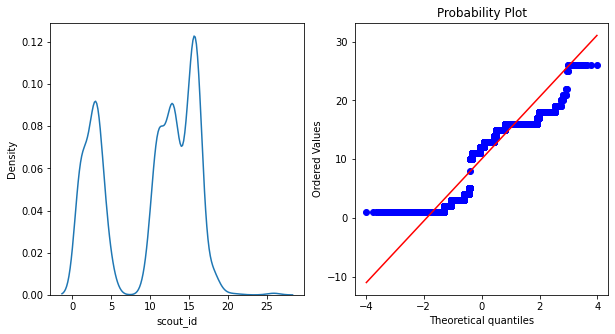

winner


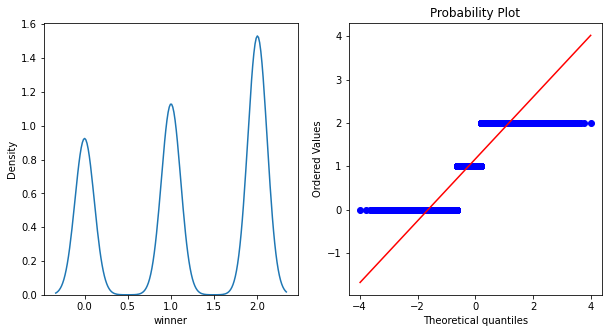

team


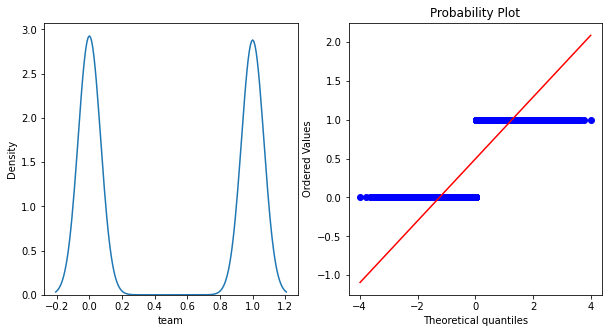

competitionId


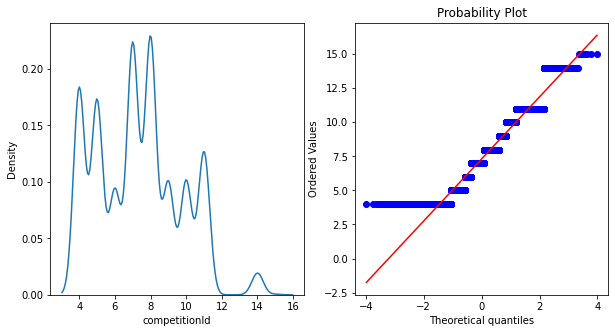

player_position_1


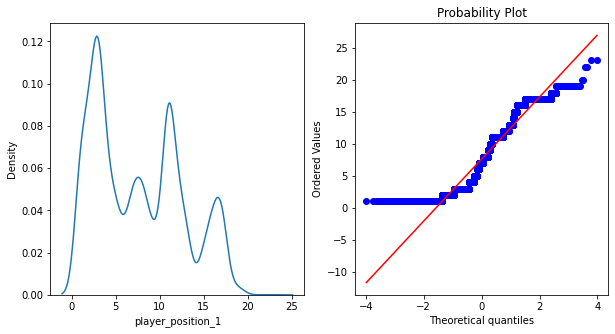

player_position_2


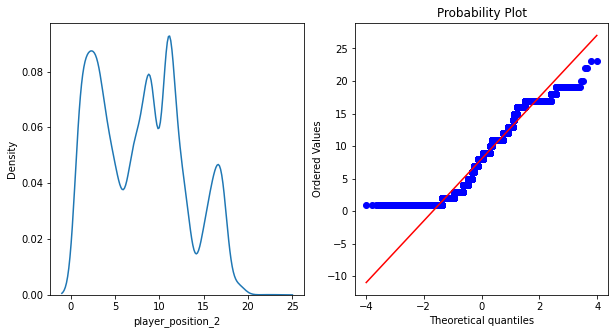

player_height


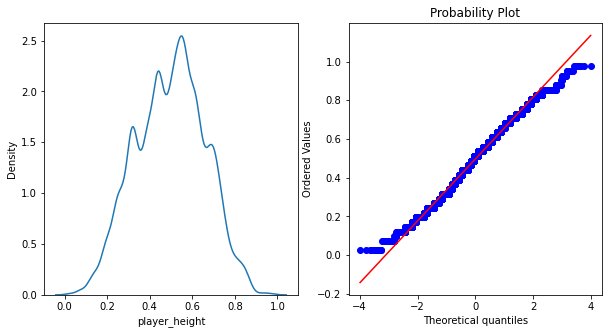

player_weight


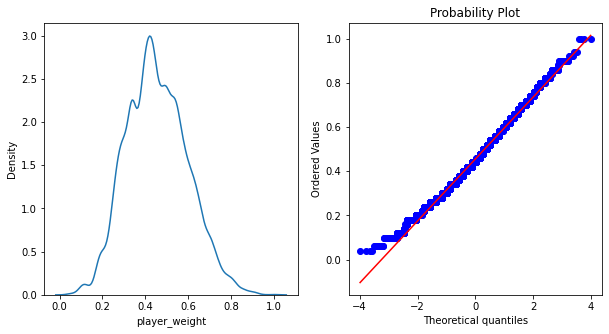

team1_system_id


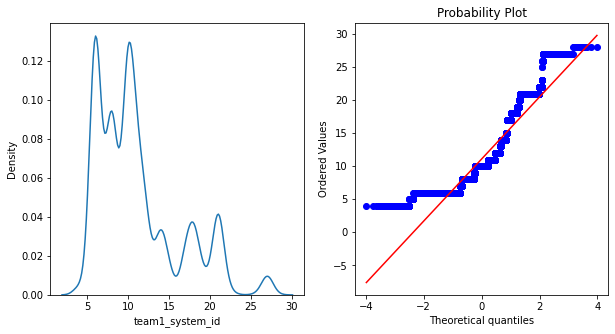

team2_system_id


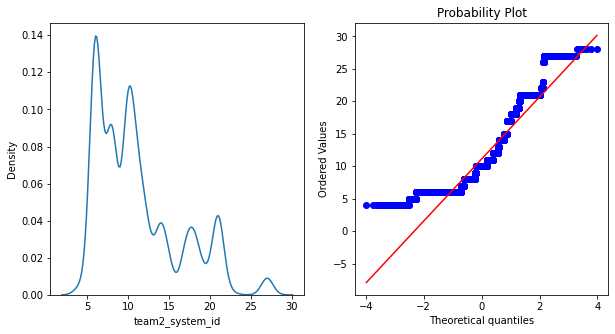

player_var


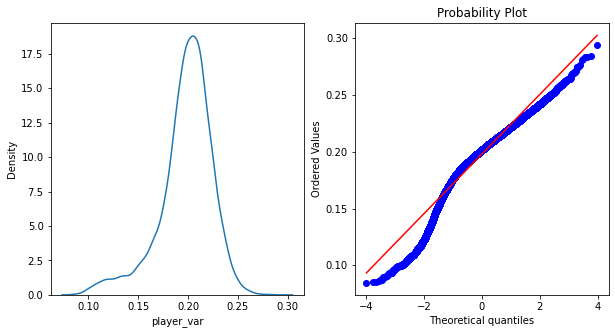

team1_var


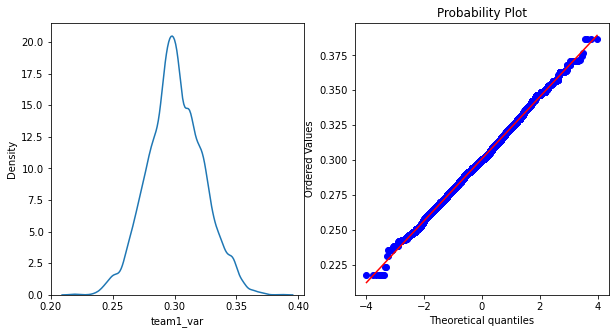

team2_var


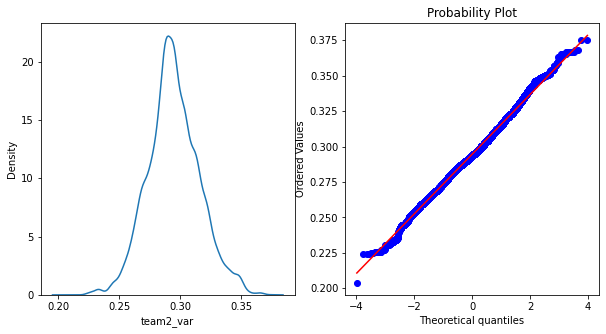

rating_num


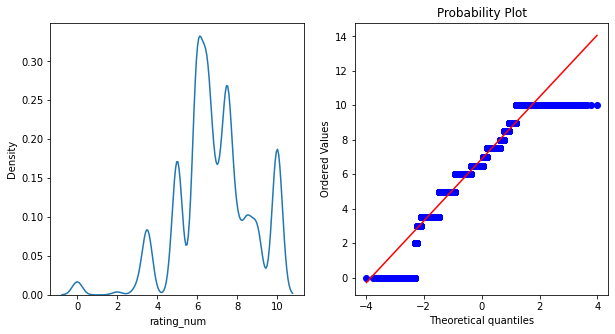

In [409]:
f=pd.DataFrame({'y_original':list(y_train),'y_predict':list(y_predict[0])})

In [405]:
f

,y_original,y_predict
0,7.0,6.5
1,6.5,6.5
2,8.5,8.5
3,8.0,8.0
4,3.5,4.0
...,...,...
20448,5.0,7.0
20449,6.0,5.0
20450,5.0,5.5
20451,6.0,8.0


In [143]:
sd=f['y_original']-f['y_predict']
pd.DataFrame(sd)

,0
0,0.0
1,0.5
2,1.0
3,1.0
4,-2.5
...,...
20448,-1.0
20449,0.0
20450,-1.0
20451,-0.5


In [146]:
f['diff']=f['y_original']-f['y_predict']
f

,y_original,y_predict,diff
0,7.0,7.0,0.0
1,6.5,6.0,0.5
2,8.5,7.5,1.0
3,8.0,7.0,1.0
4,3.5,6.0,-2.5
...,...,...,...
20448,5.0,6.0,-1.0
20449,6.0,6.0,0.0
20450,5.0,6.0,-1.0
20451,6.0,6.5,-0.5


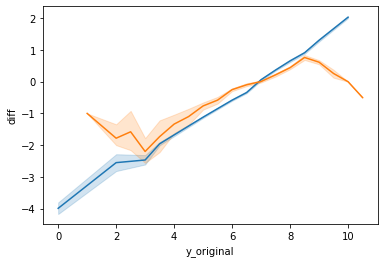

In [158]:
fig, ax = plt.subplots()
ax= sns.lineplot(x='y_original',y='diff',data=f)
ax = sns.lineplot(x='y_predict', y='diff', data=f)


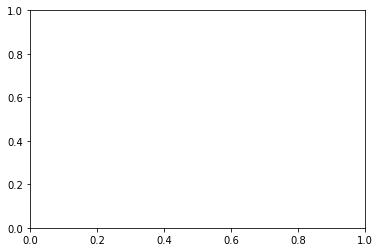

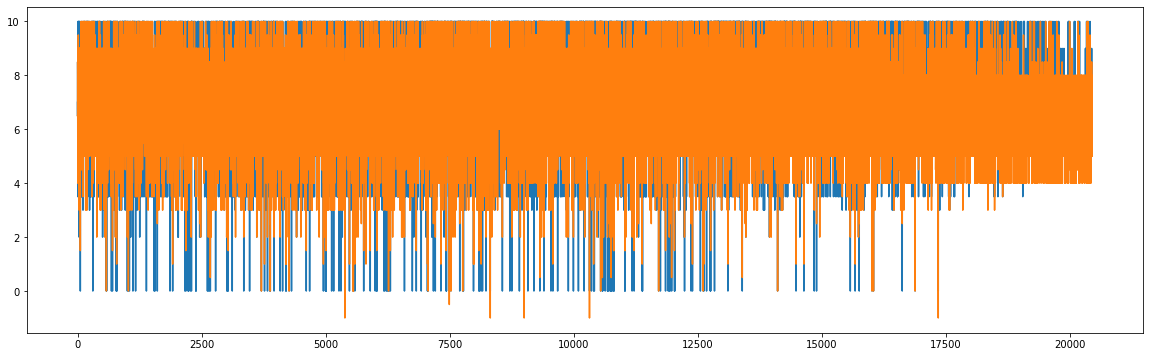

In [410]:
fig, ax = plt.subplots()
plt.figure(figsize=(20,6))
ax=plt.plot(f['y_original'],)
ax=plt.plot(f['y_predict'])

# Version 2


In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from copy import deepcopy

In [174]:
train=pd.read_csv('train_df.csv')
test=pd.read_csv('test_df.csv')

In [27]:
features=[f for f in train.columns if f!='rating_num']

In [28]:
train_c=train[features]
train_c['rating_num']=train['rating_num']

In [37]:
train=deepcopy(train_c)
del train_c

In [38]:
train.columns

Index(['scout_id', 'winner', 'team', 'competitionId', 'player_position_1',
       'player_position_2', 'player_height', 'player_weight',
       'team1_system_id', 'team2_system_id', 'player_var', 'team1_var',
       'team2_var', 'rating_num'],
      dtype='object')

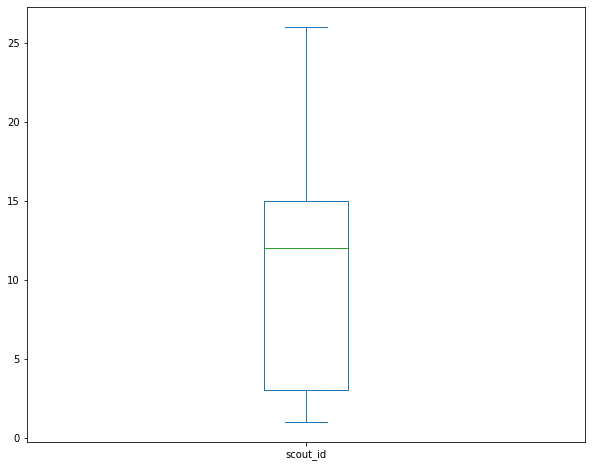

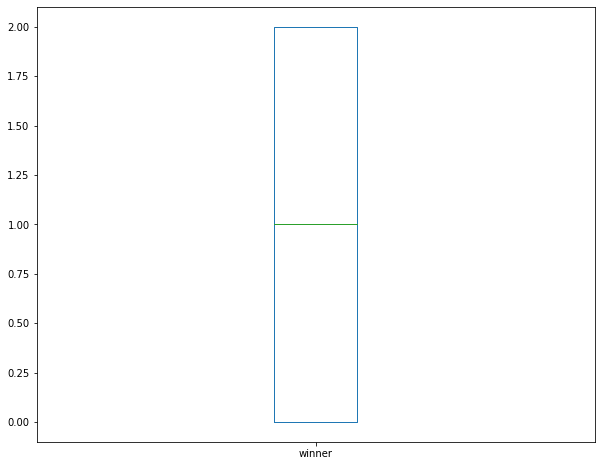

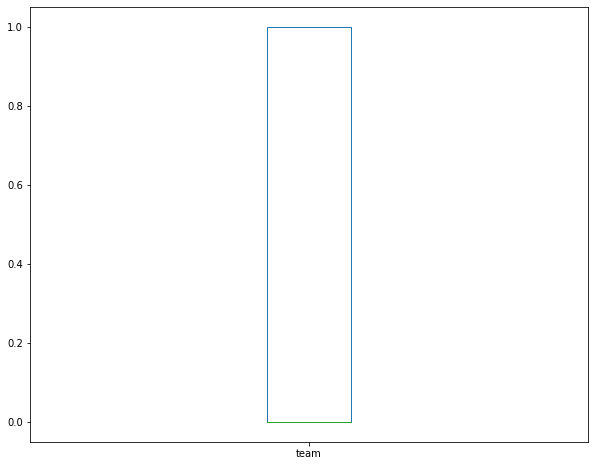

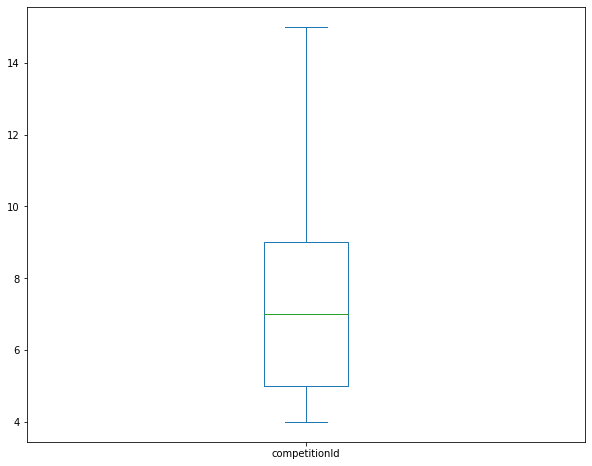

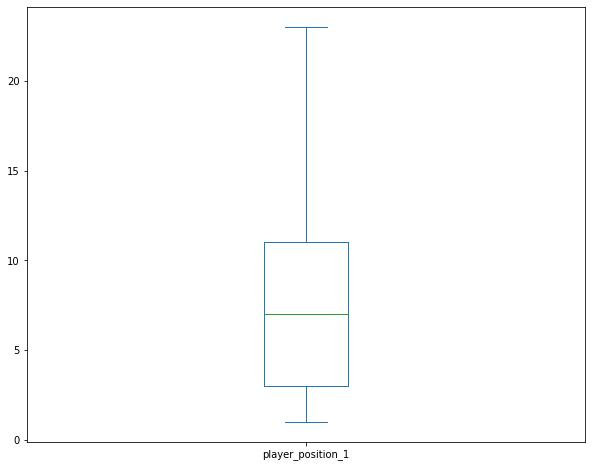

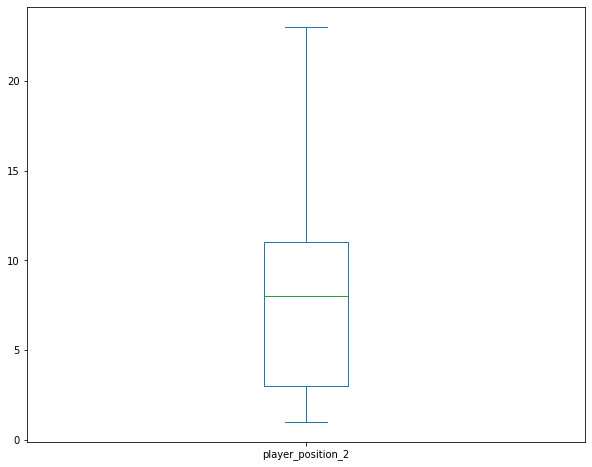

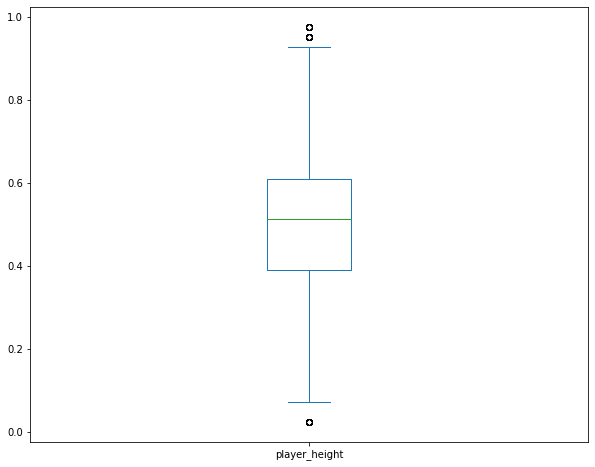

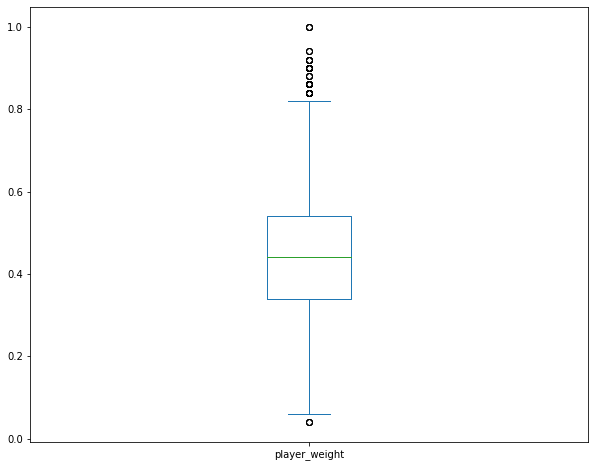

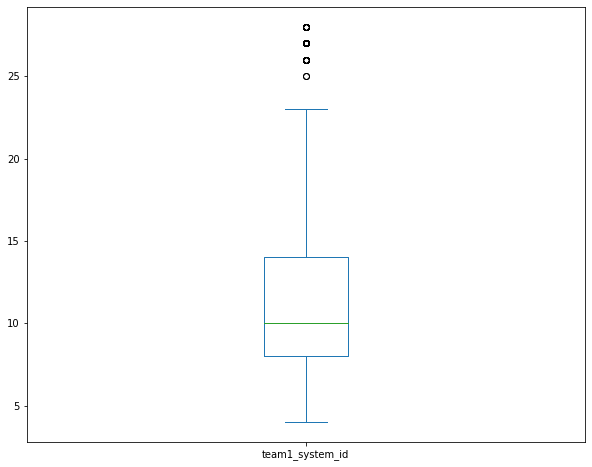

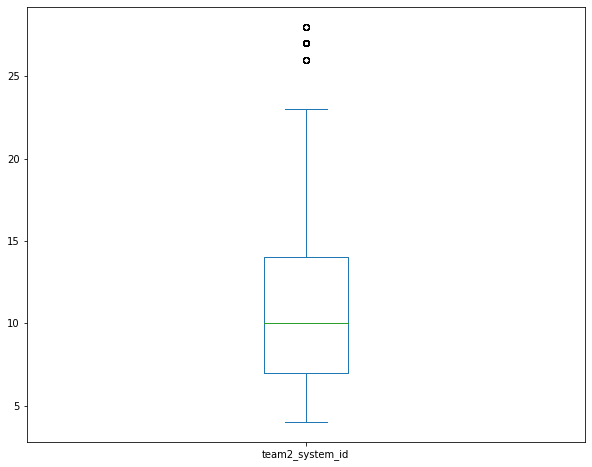

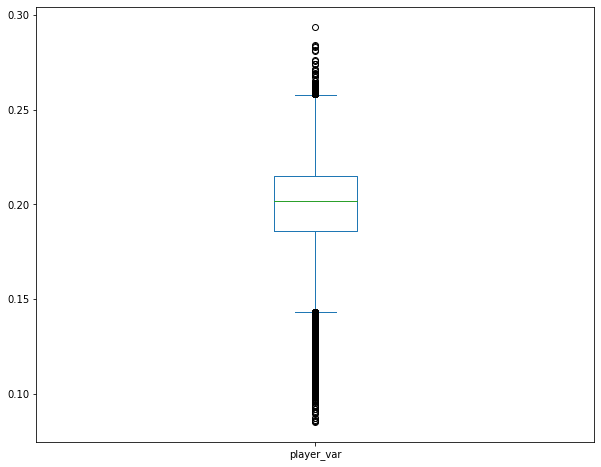

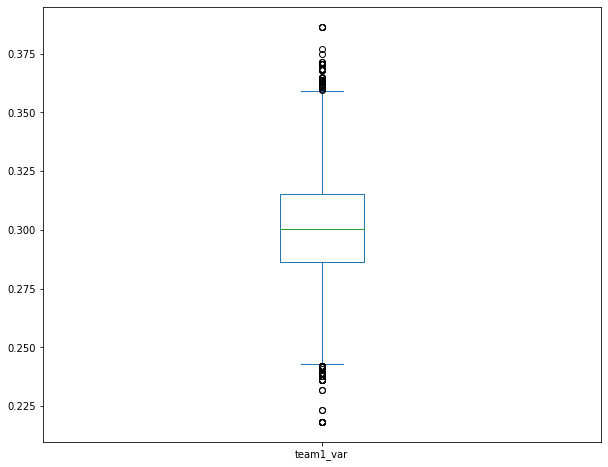

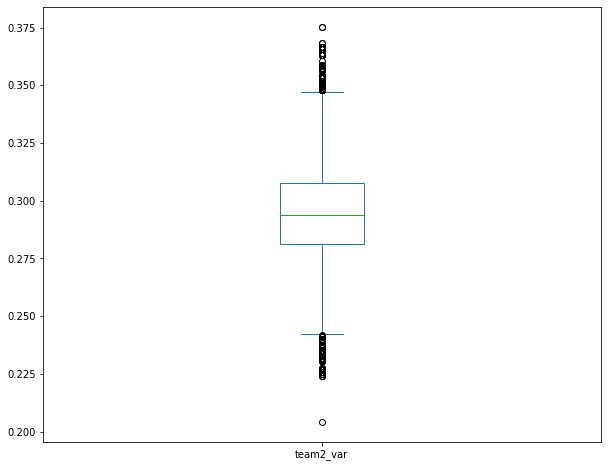

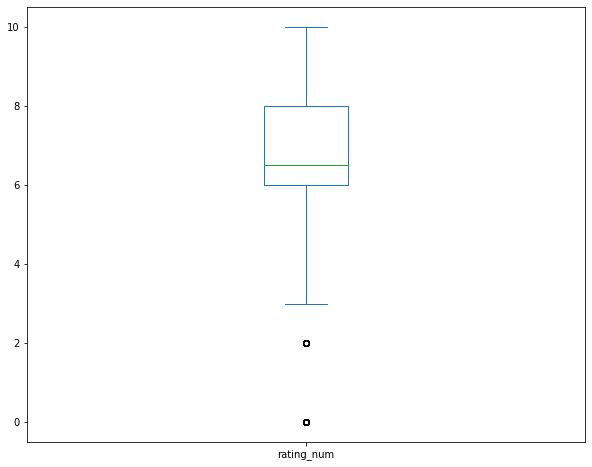

In [39]:
for i in train.columns:
    plt.figure(figsize=(10,8))
    train[i].plot(kind='box')
    plt.show()

In [44]:
import scipy.stats as stats
import pylab
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

for i in train.columns:
    print(i)
    normality(train,i)

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Input
from sklearn.model_selection import train_test_split

In [128]:
train['player_position_1']=train['player_position_1'].apply(np.round).astype('int')
train['player_position_2']=train['player_position_2'].apply(np.round).astype('int')
train['team1_system_id']=train['team1_system_id'].apply(np.round).astype('int')
train['team2_system_id']=train['team2_system_id'].apply(np.round).astype('int')

In [129]:
train

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,team1_system_id,team2_system_id,player_var,team1_var,team2_var,rating_num
0,13,2,0,8,7,7,0.317073,0.48,6,10,0.196649,0.289868,0.242414,7.0
1,16,1,1,8,3,9,0.463415,0.42,6,17,0.135126,0.319211,0.300952,6.5
2,4,1,0,5,11,11,0.682927,0.44,8,6,0.204265,0.258575,0.310282,8.5
3,13,1,1,4,17,17,0.682927,0.58,6,8,0.194560,0.296172,0.279054,8.0
4,11,0,0,5,10,10,0.731707,0.70,12,18,0.213998,0.271776,0.307297,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,14,0,1,14,8,8,0.439024,0.26,11,11,0.197323,0.300921,0.294609,5.0
20449,3,2,1,11,4,4,0.390244,0.32,19,6,0.205322,0.339145,0.321966,6.0
20450,4,1,0,7,5,5,0.268293,0.30,21,10,0.145889,0.270368,0.339861,5.0
20451,13,1,0,8,5,5,0.463415,0.46,21,15,0.175792,0.301117,0.275702,6.0


In [153]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
train.iloc[:,:-1]=scaler1.fit_transform(train.iloc[:,:-1])

In [154]:
train

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,team1_system_id,team2_system_id,player_var,team1_var,team2_var,rating_num
0,0.48,1.0,0.0,0.363636,0.272727,0.272727,0.307692,0.458333,0.083333,0.250000,0.534831,0.425915,0.223873,7.0
1,0.60,0.5,1.0,0.363636,0.090909,0.363636,0.461538,0.395833,0.083333,0.541667,0.240459,0.600259,0.565659,6.5
2,0.12,0.5,0.0,0.090909,0.454545,0.454545,0.692308,0.416667,0.166667,0.083333,0.571276,0.239980,0.620138,8.5
3,0.48,0.5,1.0,0.000000,0.727273,0.727273,0.692308,0.562500,0.083333,0.166667,0.524836,0.463372,0.437801,8.0
4,0.40,0.0,0.0,0.090909,0.409091,0.409091,0.743590,0.687500,0.333333,0.583333,0.617841,0.318417,0.602710,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,0.52,0.0,1.0,0.909091,0.318182,0.318182,0.435897,0.229167,0.291667,0.291667,0.538058,0.491589,0.528623,5.0
20449,0.08,1.0,1.0,0.636364,0.136364,0.136364,0.384615,0.291667,0.625000,0.083333,0.576330,0.718703,0.688356,6.0
20450,0.12,0.5,0.0,0.272727,0.181818,0.181818,0.256410,0.270833,0.708333,0.250000,0.291961,0.310051,0.792843,5.0
20451,0.48,0.5,0.0,0.363636,0.181818,0.181818,0.461538,0.437500,0.708333,0.458333,0.435038,0.492754,0.418229,6.0


In [155]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(dtype='int').fit(pd.DataFrame(train.iloc[:,-1]))
a=pd.DataFrame(encoder.fit_transform(train[['rating_num']]).toarray())


In [156]:
a.rename(columns={0:0.,1:2.,2:3.,3:3.5,4:5.,5:6.,6:6.5,7:7.,8:7.5,9:8.,10:8.5,11:9.,12:10.},inplace=True)

In [157]:
a

,0.0,2.0,3.0,3.5,5.0,6.0,6.5,7.0,7.5,8.0,8.5,9.0,10.0
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,0,0,0,0,1,0,0,0,0,0,0,0,0
20449,0,0,0,0,0,1,0,0,0,0,0,0,0
20450,0,0,0,0,1,0,0,0,0,0,0,0,0
20451,0,0,0,0,0,1,0,0,0,0,0,0,0


In [158]:
train

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,team1_system_id,team2_system_id,player_var,team1_var,team2_var,rating_num
0,0.48,1.0,0.0,0.363636,0.272727,0.272727,0.307692,0.458333,0.083333,0.250000,0.534831,0.425915,0.223873,7.0
1,0.60,0.5,1.0,0.363636,0.090909,0.363636,0.461538,0.395833,0.083333,0.541667,0.240459,0.600259,0.565659,6.5
2,0.12,0.5,0.0,0.090909,0.454545,0.454545,0.692308,0.416667,0.166667,0.083333,0.571276,0.239980,0.620138,8.5
3,0.48,0.5,1.0,0.000000,0.727273,0.727273,0.692308,0.562500,0.083333,0.166667,0.524836,0.463372,0.437801,8.0
4,0.40,0.0,0.0,0.090909,0.409091,0.409091,0.743590,0.687500,0.333333,0.583333,0.617841,0.318417,0.602710,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,0.52,0.0,1.0,0.909091,0.318182,0.318182,0.435897,0.229167,0.291667,0.291667,0.538058,0.491589,0.528623,5.0
20449,0.08,1.0,1.0,0.636364,0.136364,0.136364,0.384615,0.291667,0.625000,0.083333,0.576330,0.718703,0.688356,6.0
20450,0.12,0.5,0.0,0.272727,0.181818,0.181818,0.256410,0.270833,0.708333,0.250000,0.291961,0.310051,0.792843,5.0
20451,0.48,0.5,0.0,0.363636,0.181818,0.181818,0.461538,0.437500,0.708333,0.458333,0.435038,0.492754,0.418229,6.0


In [159]:
X_train, X_test, Y_train,Y_test=train_test_split(train.iloc[:,:-1],a,test_size=0.001,random_state=42,shuffle=True)

In [164]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.0001,amsgrad=True)

In [161]:
X_train=tf.convert_to_tensor(X_train)
X_train=tf.reshape(X_train,shape=(X_train.shape[0],X_train.shape[1],1))

X_test=tf.convert_to_tensor(X_test)
X_test=tf.reshape(X_test,shape=(X_test.shape[0],X_test.shape[1],1))

Y_train=tf.convert_to_tensor(Y_train)
Y_train=tf.reshape(Y_train,shape=(Y_train.shape[0],Y_train.shape[1],1))

Y_test=tf.convert_to_tensor(Y_test)
Y_test=tf.reshape(X_test,shape=(Y_test.shape[0],Y_test.shape[1],1))

In [166]:
model=Sequential([
    Input(shape=(13,1)),
    Dense(128,activation='sigmoid'),
    Dense(512,activation='sigmoid'),
    Dense(512,activation='sigmoid'),
    
    Dense(13,activation='softmax')
])
model.summary()
model.compile(optimizer=optimizer,metrics='accuracy',loss='mean_squared_error')
model.fit(X_train,Y_train,validation_split=0.1,epochs=50,shuffle=True,steps_per_epoch=10)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 13, 128)           256       
_________________________________________________________________
dense_73 (Dense)             (None, 13, 512)           66048     
_________________________________________________________________
dense_74 (Dense)             (None, 13, 512)           262656    
_________________________________________________________________
dense_75 (Dense)             (None, 13, 13)            6669      
Total params: 335,629
Trainable params: 335,629
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 1s 60ms/step - loss: 0.0715 - accuracy: 0.0000e+00 - val_loss: 0.0713 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 46ms/step - loss: 0.0711 - accuracy: 0.18

In [110]:
Y_train.shape

TensorShape([16362, 13])